In [1]:
import sys
import numpy as np
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
import xarray as xr
import pandas as pd
from icon_smt_levels import dzw, dzt, depthc, depthi


xarray
done xarray


In [2]:

ts = pyic.timing([0], 'start')

### configure paths
run      = 'ngSMT_tke'
savefig  = False
path_fig = '../pics/'
nnf      = 0

gname = 'smt'
lev   = 'L128'

#path_data    = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/????-??/'
path_data    = '/scratch/u/u241317/calc/pp_calc_m_div.nc'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
fpath_Tri    = '/mnt/lustre01/work/mh0033/m300602/tmp/Tri.pkl'

path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'


In [ ]:
### read out grid data
#  plus first calculations
# f = Dataset(path_data, 'r')
# div_v = f.variables['div_v'][:]
# f.close()

In [3]:
ds = xr.open_dataset(path_data)

In [5]:
#####################################################################
### Calculate DIvergence of multiple layers
levs = np.arange(depthi.size)
nz = levs.size
#depthc = depthc[levs]

jc = int(59799625)
fpatho = '/scratch/u/u241317/calc/pp_calc_w.nc'
#path_data = '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-03/'
fo = Dataset(fpatho, 'w')
fo.createDimension('depthi', nz) # depth
fo.createDimension('w', jc) # new dim

ncv = fo.createVariable('depthi','f4',('depthi',))
ncv[:] = depthi[:nz]

nc_w = fo.createVariable('w','f4',('depthi','w',))

# --- prepare output netcdf file
ts = pyic.timing(ts, 'prepare nc')
varfile = 'vn'
layers = (  ['sp_001-016']*16 + ['sp_017-032']*16 + ['sp_033-048']*16
          + ['sp_049-064']*16 + ['sp_065-080']*16 + ['sp_081-096']*16 + ['sp_097-112']*16)




0:00:01.115084   0:00:01.115084  prepare nc


In [4]:

w = np.zeros([depthi.size, 59799625], dtype='f4')

div_v = ds.div_v

a,b = div_v.shape



In [9]:
iz = np.argmin(np.abs(depthc-50.))
iz

15

In [108]:
#hier ist ein maskierter array sicherlich von vorteil
#w = np.zeros([depthi.size, 59799625], dtype='f4')
#ds = ds.assign({'w': (('depthi','cc'), w)})

MemoryError: Unable to allocate 25.2 GiB for an array with shape (113, 59799625) and data type float32

In [7]:
for z in reversed(range(112)):
    #print(z)
    w[z,:] = -w[z+1,:] - div_v[z,:]*dzw[z]
  #ts = pyic.timing(ts, 'loop step') 
 # w2 = ds.w.isel(depthi=(z-1))
 # w1 = ds.w.isel(depthi=z)
  #w2 = w1 - div_v.isel(depthc=(z-1)) * dzw[z-1]   
  #w.isel(lev-1) = w.isel(lev) - div_v.isel(depthc=(lev-1)) * dzw(lev-1)
 # w1 = ds.w.isel(depthi=z)
#  w2 = ds.w.isel(depthi=z) - div_v.isel(depthc=(z-1)) * dzw[z-1]  
#  ds.w.isel(depthi=(z-1)) = w2
    
  #nc_w[kk,:] = w[:cc]

#fo.close()

In [28]:
w[10,:]

array([-0.00251144,  0.0042403 ,  0.00516971, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [17]:
%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

15

Text(0, 0.5, 'latitude')

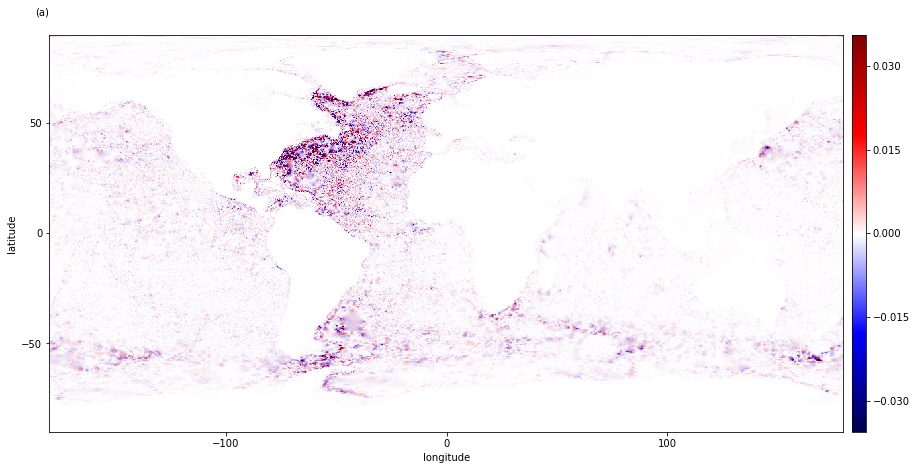

In [23]:
### Plot vertical heat flux
#Rectangular Grid
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
#lon, lat, toi = pyic.interp_to_rectgrid(div_v[10,:], fpath_ckdtree, coordinates='clat clon');
lon, lat, toi = pyic.interp_to_rectgrid(w[iz,:], fpath_ckdtree, coordinates='clat clon');

#adjust colorbar to 0 and emphazise coloring
a=0.1
if abs(toi.min()) < abs(toi.max()) :
    tm = abs(toi.min())
else :
    tm = abs(toi.max())

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=3.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, cmap='seismic', clim=(-a*tm,a*tm))#clim='sym'
#colors.TwoSlopeNorm(vcenter=0)  ,norm=MidpointNormalize(midpoint=0. clim=(a*toi.min(),a*toi.max())
#colors.TwoSlopeNorm(vmin=-5., vcenter=0., vmax=10)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('vert. velocity at %s and %.1fm depth'%(IcD.times[it], IcD.depthc[iz]))
#cax.set_title('$^o$C')
#ax.set_xlim([-35, -3])
#ax.set_ylim([4, 45])

In [30]:
w[iz,:]

array([-0.01266654, -0.02251458, -0.0030529 , ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [31]:
ls

Untitled.ipynb                             smt_calc_w.ipynb
Untitled1.ipynb                            smt_grid_names
__pycache__/                               smt_remap_velocities.ipynb
icon_smt_levels.py                         smtnatl_for_moritz.ipynb
maps_icon_smt_temp.py*                     smtnatl_overview.ipynb
plot_calculations_for_vertical_heat.ipynb  test.png
pp_calc_div1.nc                            test2.png
run_batch_job/


toi.min() %d -0.23600383
toi.max() %d 0.33788705


Text(0, 0.5, 'latitude')

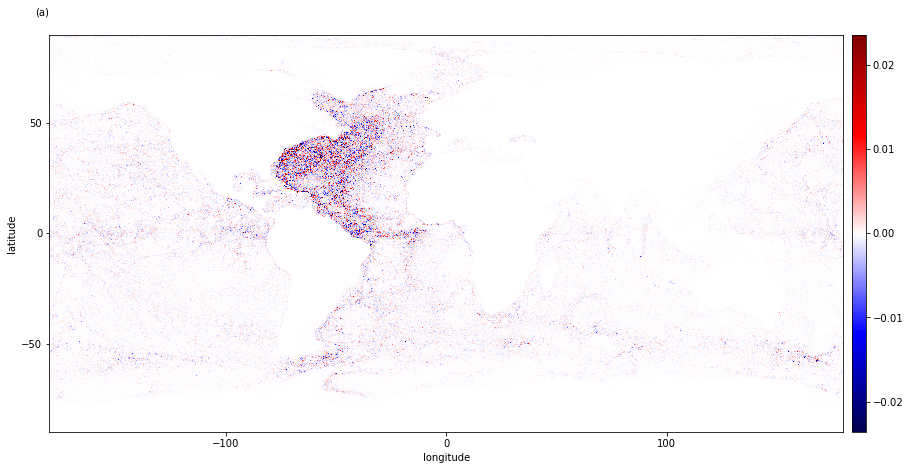

In [16]:
### Plot vertical heat flux
#Rectangular Grid
#fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
#fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.10_180W-180E_90S-90N.npz'


#lon, lat, toi = pyic.interp_to_rectgrid(div_v[10,:], fpath_ckdtree, coordinates='clat clon');
lon, lat, toi = pyic.interp_to_rectgrid(w[iz,:], fpath_ckdtree, coordinates='clat clon');

#adjust colorbar to 0 and emphazise coloring
a=0.1
if abs(toi.min()) < abs(toi.max()) :
    tm = abs(toi.min())
else :
    tm = abs(toi.max())

print('toi.min() %d', toi.min()); print('toi.max() %d', toi.max())    
    
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=3.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, cmap='seismic', clim=(-a*tm,a*tm))#clim='sym'
#colors.TwoSlopeNorm(vcenter=0)  ,norm=MidpointNormalize(midpoint=0. clim=(a*toi.min(),a*toi.max())
#colors.TwoSlopeNorm(vmin=-5., vcenter=0., vmax=10)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
#ax.set_title('vert. velocity at %s and %.1fm depth'%(it, depthc[iz]))
#cax.set_title('$^o$C')
#ax.set_xlim([-35, -3])
#ax.set_ylim([4, 45])

NameError: name 'Tri' is not defined

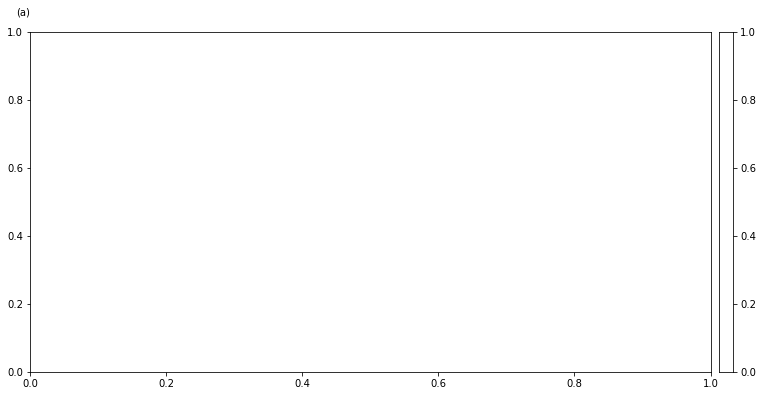

In [19]:
# ccrs_proj = ccrs.PlateCarree()
ccrs_proj = None
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, projection=ccrs_proj, fig_size_fac=3)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(Tri, w[iz,:], ax=ax, cax=cax, clim=2)
#ax.set_xlim(lon_reg)
#ax.set_ylim(lat_reg)

## Plot Divergence

Text(0, 0.5, 'latitude')

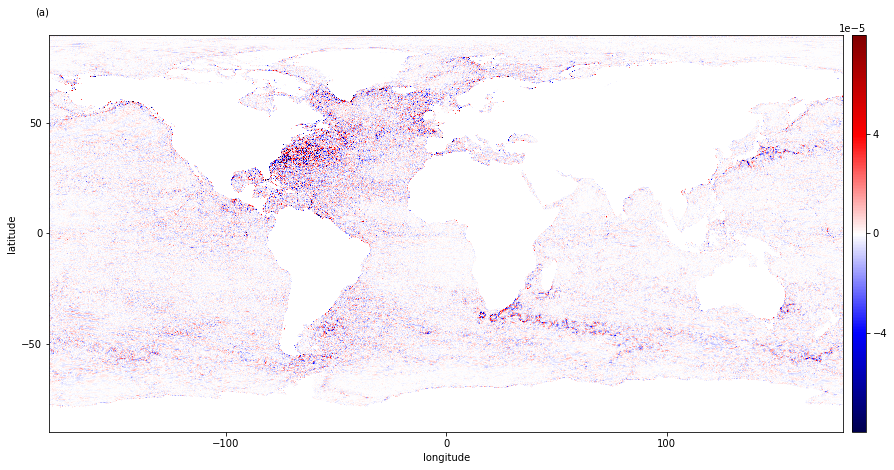

In [39]:
### Plot vertical heat flux
#Rectangular Grid
#fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

#lon, lat, toi = pyic.interp_to_rectgrid(div_v[10,:], fpath_ckdtree, coordinates='clat clon');
lon, lat, toi = pyic.interp_to_rectgrid(div_v.isel(depthc=iz), fpath_ckdtree, coordinates='clat clon');

#adjust colorbar to 0 and emphazise coloring
a=0.1
if abs(toi.min()) < abs(toi.max()) :
    tm = abs(toi.min())
else :
    tm = abs(toi.max())

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=3.5)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, cmap='seismic', clim=(-a*tm,a*tm))#clim='sym'
#colors.TwoSlopeNorm(vcenter=0)  ,norm=MidpointNormalize(midpoint=0. clim=(a*toi.min(),a*toi.max())
#colors.TwoSlopeNorm(vmin=-5., vcenter=0., vmax=10)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
#ax.set_title('vert. velocity at %s and %.1fm depth'%(IcD.times[it], IcD.depthc[iz]))
#cax.set_title('$^o$C')
#ax.set_xlim([-35, -3])
#ax.set_ylim([4, 45])

## interpolate to rectangular grid selection

In [6]:
# --- interpolate to rectgrid
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

ddnpz = np.load(fpath_ckdtree)
lon_002deg = ddnpz['lon']
lat_002deg = ddnpz['lat']

In [7]:
lon_reg_2 = [-75, -55]
lat_reg_2 = [33, 43]

# --- cut domain 2
i1r2 = (lon_002deg<lon_reg_2[0]).sum()
i2r2 = (lon_002deg<lon_reg_2[1]).sum()
j1r2 = (lat_002deg<lat_reg_2[0]).sum()
j2r2 = (lat_002deg<lat_reg_2[1]).sum()

lon_002deg_r2 = lon_002deg[i1r2:i2r2]
lat_002deg_r2 = lat_002deg[j1r2:j2r2]
#ro_002deg_r2= ro_002deg[j1r2:j2r2,i1r2:i2r2]

In [10]:
wo_002deg = pyic.apply_ckdtree(w[iz,:], fpath_ckdtree, coordinates='clat clon', radius_of_influence=1.).reshape(lat_002deg.size, lon_002deg.size)
wo_002deg[wo_002deg==0.] = np.ma.masked
wo_002deg_r2= wo_002deg[j1r2:j2r2,i1r2:i2r2]

In [11]:
wo_002deg

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [4.267095573595725e-05, 4.267095573595725e-05,
         4.267095573595725e-05, ..., -1.1501678272907156e-05,
         -1.1501678272907156e-05, -1.1501678272907156e-05],
        [4.267095573595725e-05, 4.267095573595725e-05,
         4.267095573595725e-05, ..., -1.1501678272907156e-05,
         -1.1501678272907156e-05, -1.1501678272907156e-05],
        [4.267095573595725e-05, 4.267095573595725e-05,
         4.267095573595725e-05, ..., -1.1501678272907156e-05,
         -1.1501678272907156e-05, -1.1501678272907156e-05]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, Fal

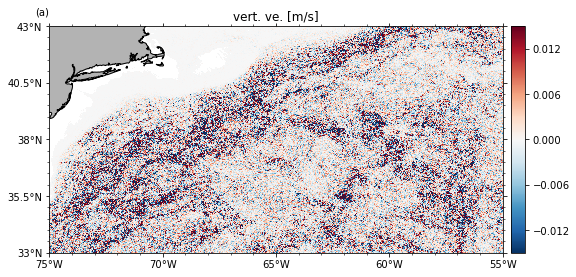

In [12]:
ccrs_proj = ccrs.PlateCarree()
# ccrs_proj = None
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, projection=ccrs_proj, fig_size_fac=2)
ii=-1
clim = 0.015

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon_002deg_r2, lat_002deg_r2, wo_002deg_r2, ax=ax, cax=cax, clim=clim, 
                transform=ccrs_proj, rasterized=False)
ax.set_title('vert. ve. [m/s]')


for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg_2, ylim=lat_reg_2)

In [24]:
iz

15

CPU times: user 4.65 s, sys: 4.59 s, total: 9.24 s
Wall time: 9.96 s


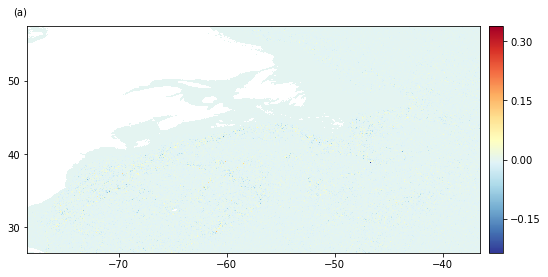

In [38]:
%%time
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'
lon_reg = [-78.5, -36.5]
lat_reg = [26.5, 57.5]
# lon_reg = [-66., -64.]
# lat_reg = [41, 42]
# clon_reg, clat_reg, vertex_of_cell_reg, edge_of_cell_reg, ind_reg = pyic.crop_tripolar_grid(lon_reg, lat_reg,
#                        clon, clat, vertex_of_cell, edge_of_cell)
lon, lat, toi = pyic.interp_to_rectgrid(w[iz,:], fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)

hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.5, fig_size_fac=2.)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax)

# Save data

In [5]:
#####################################################################
### Calculate 
a,b = div_v.shape
levs = np.arange(depthi.size)
nz = levs.size
#depthc = depthi[levs]

fpatho = '/scratch/u/u241317/calc/pp_calc_w2.nc'
#path_data = '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-03/'
fo = Dataset(fpatho, 'w', format='NETCDF4')
fo.createDimension('depthi', nz) # depth
fo.createDimension('vert_velocity', b) # new dim

ncv = fo.createVariable('depthi','f4','depthi')
ncv[:] = depthi[:nz]

nc_w = fo.createVariable('w','f4',('depthi','vert_velocity'))

# # only march data
# path_data = '/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-03/'
# levs = np.array([1,2,3,4,5]) # only for testing

# for kk, lev in enumerate(levs):
#   ts = pyic.timing(ts, 'loop step')

#   ds.w.isel(lev-1) = ds.w.isel(lev) - ds.div_v.isel(depthc=(lev-1)) * dzw(lev-1)

#   #nc_w[kk,:] = ds.w[:cc]

# fo.close()

for z in reversed(range(a)):
    print(z)
    w[z,:]    = - w[z+1,:] - div_v[z,:] * dzw[z]
    nc_w[z,:] = w[z,:b]

fo.close()

111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0


In [8]:
w.shape

(113, 59799625)

In [35]:
a,b = div_v.shape
w = np.zeros([depthi.size, b], dtype='f4')

MemoryError: Unable to allocate 25.2 GiB for an array with shape (113, 59799625) and data type float32

In [36]:
a

112

In [16]:
del w

In [20]:
# load calculated divergence
path_data = '/scratch/u/u241317/calc/pp_calc_w.nc'
ds_w      = xr.open_dataset(path_data)
w         = ds_w.w.isel(depthi=15)

wo_002deg = pyic.apply_ckdtree(w, fpath_ckdtree, coordinates='clat clon', radius_of_influence=1.).reshape(lat_002deg.size, lon_002deg.size)
wo_002deg[wo_002deg==0.] = np.ma.masked
wo_002deg_r2= wo_002deg[j1r2:j2r2,i1r2:i2r2]

wo_002deg

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)